In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


**Reading the data**

In [2]:
airnd_df = pd.read_csv("/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv")

/tmp/ipykernel_17/2083687841.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airnd_df = pd.read_csv("/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv")


One column has mixed types of data so Specify dtype option on import or set low_memory=False.

In [3]:
airnd_df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [4]:
airnd_df = pd.read_csv("/kaggle/input/airbnbopendata/Airbnb_Open_Data.csv",index_col = 'id',low_memory=False)

In [5]:
airnd_df.shape

(102599, 25)

**Total 25 columns**

**Check if any columns has missing values**

In [6]:
before_nulls = airnd_df.isna().sum()
before_nulls

NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        52131
license         

**Handling name**
1. Since all columns are lower case lets make it to lower case

In [7]:
airnd_df.rename(columns = {'NAME':'name'},inplace=True)

In [8]:
airnd_df.head()

,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


**Even though few names are null still we can find name if their lat and long matches with any other**

In [9]:
airnd_df.groupby(['lat','long']).name.count()

lat       long     
40.49979  -74.24084    1
40.50456  -74.24984    1
40.50641  -74.23059    1
40.50708  -74.24285    2
40.50863  -74.24135    1
                      ..
40.91248  -73.84885    1
40.91306  -73.89389    1
40.91310  -73.89518    1
40.91685  -73.90136    1
40.91697  -73.90125    1
Name: name, Length: 67162, dtype: int64

**Based on above result we can assume that lat and long are repating so we can try to fix names** 

In [10]:
# new_name = airnd_df.loc[(airnd_df['lat'] == 40.50708) & (airnd_df['long'] == -74.24285) ,'name'].unique()[0]
# new_name

In [11]:
def fill_name(x):
    if pd.isna(x.name):
        new_name = airnd_df.loc[(airnd_df['lat'] == x.lat) & (airnd_df['long'] == x.long) ,'name'].unique()[0]
        x.name = new_name 
    return x

In [12]:
updated_df = airnd_df.apply(fill_name,axis = 1)

In [13]:
updated_df.isna().sum()

name                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        52131
license         

**No use none of them are matching**

**Since we can get the name we need to drop columns with name = null**

In [14]:
updated_df.dropna(subset=['name'],inplace = True)

In [15]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified               277
host name                            400
neighbourhood group                   27
neighbourhood                         16
lat                                    8
long                                   8
country                              527
country code                         123
instant_bookable                      97
cancellation_policy                   71
room type                              0
Construction year                    205
price                                244
service fee                          273
minimum nights                       403
number of reviews                    182
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license         

In [16]:
updated_df.shape

(102349, 25)

**Making all null host_identity to unconfirmed**

In [17]:
updated_host_identity = updated_df.host_identity_verified.fillna('unconfirmed')

In [18]:
updated_df['host_identity_verified'] = updated_host_identity

In [19]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                            400
neighbourhood group                   27
neighbourhood                         16
lat                                    8
long                                   8
country                              527
country code                         123
instant_bookable                      97
cancellation_policy                   71
room type                              0
Construction year                    205
price                                244
service fee                          273
minimum nights                       403
number of reviews                    182
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license         

**Making all null host_names to unknown**

In [20]:
updated_df['host name'] = updated_df['host name'].fillna('unknown')

In [21]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
neighbourhood group                   27
neighbourhood                         16
lat                                    8
long                                   8
country                              527
country code                         123
instant_bookable                      97
cancellation_policy                   71
room type                              0
Construction year                    205
price                                244
service fee                          273
minimum nights                       403
number of reviews                    182
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license         

In [22]:
updated_df.loc[:,'neighbourhood group':'neighbourhood']

,neighbourhood group,neighbourhood
id,,
1001254,Brooklyn,Kensington
1002102,Manhattan,Midtown
1002403,Manhattan,Harlem
1003689,Manhattan,East Harlem
1004098,Manhattan,Murray Hill
...,...,...
6092437,Brooklyn,Williamsburg
6092990,Manhattan,Morningside Heights
6093542,Brooklyn,Park Slope


In [23]:
updated_df.groupby(['neighbourhood group','neighbourhood']).name.count()

neighbourhood group  neighbourhood
Bronx                Allerton         97
                     Baychester       29
                     Belmont          45
                     Bronxdale        47
                     Castle Hill      22
                                      ..
Staten Island        Westerleigh       5
                     Willowbrook       3
                     Woodrow           3
brookln              South Slope       1
manhatan             Chelsea           1
Name: name, Length: 226, dtype: int64

In [24]:
updated_df.loc[(updated_df['neighbourhood group'] == 'Bronx') & (updated_df['neighbourhood'] == 'Allerton')]

,name,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
id,,,,,,,,,,,,,,,,,,,,,
1283561,A PRIVATE FLAT / APARTMENT- $SPECIAL$,25554233693,unconfirmed,Alford,Bronx,Allerton,40.86466,-73.85709,United States,US,...,$15,2.0,271.0,6/20/2019,2.84,1.0,2.0,NaN,Please remember that this is a residential bui...,NaN
1646422,Hi Traveler.. welcome,39562464038,verified,Ellen,Bronx,Allerton,40.86870,-73.85240,United States,US,...,$20,7.0,2.0,7/23/2018,0.17,5.0,1.0,165.0,No Smoking No Pets,NaN
1873418,2 Beds/Queen & Full Beautiful Room 40 minsT.Sq...,62351131714,unconfirmed,Enrique,Bronx,Allerton,40.85956,-73.87067,United States,US,...,$232,2.0,169.0,6/12/2019,2.07,1.0,4.0,359.0,- No Smoking In the House. There is a back po...,NaN
1922020,PRIVATE BATH/TONS OF SUNLIGHT/SAFE,77129391486,unconfirmed,Enrique,Bronx,Allerton,40.85840,-73.86969,United States,US,...,$109,2.0,189.0,6/23/2019,2.32,2.0,4.0,393.0,Quiet hours are from midnight to 6 a.m. We as...,NaN
1944112,Nice beautiful room In the Bronx,51589747151,unconfirmed,Enrique,Bronx,Allerton,40.85914,-73.86979,United States,US,...,$192,1.0,187.0,6/23/2019,2.34,4.0,4.0,313.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54298838,#ERROR!,41841353089,verified,William,Bronx,Allerton,40.86014,-73.86301,United States,US,...,$173,1.0,30.0,7/2/2019,2.56,4.0,5.0,48.0,The apartment is non-smoking and pets are not ...,NaN
54299943,"❤️ Beautiful, Bright Room - Late Self Check-In...",14682176495,unconfirmed,William,Bronx,Allerton,40.86013,-73.86339,United States,US,...,$115,1.0,30.0,7/2/2019,2.56,2.0,5.0,57.0,NaN,NaN
54394386,Private Room,56063277482,verified,Momo,Bronx,Allerton,40.86659,-73.86600,United States,US,...,$17,2.0,0.0,NaN,NaN,3.0,1.0,0.0,Please remember that this is a residential bui...,NaN


**We are combining both neighbourhood group and neighbourhood to make a single column area**

In [25]:
updated_df['area'] = updated_df['neighbourhood group'] + ' '+ updated_df['neighbourhood']

**now we can drop neighbourhood group and neighbourhood and lat and long as well since location is already there and they don't add more value**

In [26]:
updated_df.drop(columns = ['neighbourhood group','neighbourhood','lat','long'],inplace = True)

In [27]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
country                              527
country code                         123
instant_bookable                      97
cancellation_policy                   71
room type                              0
Construction year                    205
price                                244
service fee                          273
minimum nights                       403
number of reviews                    182
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license                           102347
area                                  43
dtype: int64

In [28]:
updated_df.loc[:,'country':'country code']

,country,country code
id,,
1001254,United States,US
1002102,United States,US
1002403,United States,US
1003689,United States,US
1004098,United States,US
...,...,...
6092437,United States,US
6092990,United States,US
6093542,United States,US


In [29]:
updated_df.country.unique()

array(['United States', nan], dtype=object)

**whole dataset have only 1 country and 1 countrycode so we can drop both of them**

In [30]:
updated_df.drop(columns = ['country','country code'],inplace = True)

In [31]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
instant_bookable                      97
cancellation_policy                   71
room type                              0
Construction year                    205
price                                244
service fee                          273
minimum nights                       403
number of reviews                    182
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license                           102347
area                                  43
dtype: int64

In [32]:
updated_df['instant_bookable'].unique()

array([False, True, nan], dtype=object)

**we will assign true or false based on the mode(of instant_bookable) of that area**

In [33]:
updated_df.loc[(updated_df['area'] == 'Brooklyn Kensington'),'instant_bookable'].mode()[0]

True

In [34]:
def update_instant_bookable(x):
    if pd.isna(x.instant_bookable):
        m = updated_df.loc[(updated_df['area'] == x.area),'instant_bookable'].mode()
        if len(m) == 0:
            x['instant_bookable'] = 'False'
        else:
            x['instant_bookable'] = m[0]
    return x

In [35]:
updated_df = updated_df.apply(update_instant_bookable,axis = 1)
#updated_df.apply(update_instant_bookable,axis = 1)

In [36]:
updated_df

,name,host id,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,area
id,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,Brooklyn Kensington
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,Manhattan Midtown
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,Manhattan Harlem
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,Manhattan East Harlem
1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN,Manhattan Murray Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092437,Spare room in Williamsburg,12312296767,verified,Krik,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN,Brooklyn Williamsburg
6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN,Manhattan Morningside Heights
6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN,Brooklyn Park Slope


**We need to handle cancelation policy**

In [37]:
updated_df['cancellation_policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

**we will make all nan values to flexible since they didn't mention it is not important**

In [38]:
updated_df['cancellation_policy'] = updated_df['cancellation_policy'].fillna('flexible')

In [39]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                    205
price                                244
service fee                          273
minimum nights                       403
number of reviews                    182
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license                           102347
area                                  43
dtype: int64

In [40]:
mean = updated_df['Construction year'].mean()

In [41]:
updated_df['Construction year'].dtype

dtype('float64')

In [42]:
updated_df['Construction year'] = updated_df['Construction year'].fillna(2012.0)
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                      0
price                                244
service fee                          273
minimum nights                       403
number of reviews                    182
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license                           102347
area                                  43
dtype: int64

In [43]:
updated_df['service fee']

id
1001254    $193 
1002102     $28 
1002403    $124 
1003689     $41 
1004098    $115 
           ...  
6092437    $169 
6092990    $167 
6093542    $198 
6094094    $109 
6094647    $206 
Name: service fee, Length: 102349, dtype: object

**Convert price and service fee to integer and null value to 0**

In [44]:
def price_service_converstion(x):
    #handling price
    if not pd.isna(x['price']):
        temp = x['price'][1:]
        #to remove ','
        ans = ''
        for i in temp:
            if i != ',':
                ans = ans+i 
        x['price'] = int(ans)
        
    else:
        x['price'] = 0
        
    #handling service fee
    if not pd.isna(x['service fee']):
        temp = x['service fee'][1:]
        #to remove ','
        ans = ''
        for i in temp:
            if i != ',':
                ans = ans+i 
        x['service fee'] = int(ans)
        
    else:
        x['service fee'] = 0
    
    return x
    
        

In [45]:
updated_df = updated_df.apply(price_service_converstion,axis = 1)

In [46]:
updated_df

,name,host id,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,area
id,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,False,strict,Private room,2020.0,966,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN,Brooklyn Kensington
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,False,moderate,Entire home/apt,2007.0,142,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN,Manhattan Midtown
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,True,flexible,Private room,2005.0,620,124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,Manhattan Harlem
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,False,moderate,Entire home/apt,2009.0,204,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN,Manhattan East Harlem
1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,True,flexible,Entire home/apt,2013.0,577,115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN,Manhattan Murray Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092437,Spare room in Williamsburg,12312296767,verified,Krik,False,flexible,Private room,2003.0,844,169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN,Brooklyn Williamsburg
6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,True,moderate,Private room,2016.0,837,167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN,Manhattan Morningside Heights
6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,True,moderate,Private room,2009.0,988,198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN,Brooklyn Park Slope


**After converting then filling the 0 with its mean**

**Here we are filling mean based on the area**

In [47]:
def update_prices(x):
    if x['price'] == 0:
        m = updated_df.loc[(updated_df['area'] == x.area),'price'].mean()
        # If that area is present only once then we won't get value we get null
        #in that case we will insert mean of price there
        if not pd.isna(m):
            x['price'] = int(m)
        else:
            x['price'] = updated_df['price'].mean()
            
    
    if x['service fee'] == 0:
        m = updated_df.loc[(updated_df['area'] == x.area),'service fee'].mean()
        # If that area is present only once then we won't get value we get null
        #in that case we will insert mean of price there
        if not pd.isna(m):
            x['service fee'] = int(m)
        else:
            x['service fee'] = updated_df['service fee'].mean()
    return x
        

In [48]:
updated_df = updated_df.apply(update_prices,axis = 1)

In [49]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                      0
price                                  0
service fee                            0
minimum nights                       403
number of reviews                    182
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license                           102347
area                                  43
dtype: int64

**To fill minimum nights we use mode on them**

In [50]:
m = updated_df['minimum nights'].mode()[0]
m

1.0

In [51]:
updated_df['minimum nights'] = updated_df['minimum nights'].fillna(m)

In [52]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                      0
price                                  0
service fee                            0
minimum nights                         0
number of reviews                    182
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license                           102347
area                                  43
dtype: int64

**We will fill number of reviews null values with no review**

In [53]:
updated_df['number of reviews'] = updated_df['number of reviews'].fillna('no reviews')

In [54]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                      0
price                                  0
service fee                            0
minimum nights                         0
number of reviews                      0
last review                        15857
reviews per month                  15843
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license                           102347
area                                  43
dtype: int64

**no need of last review,reviews per month**

In [55]:
updated_df.drop(columns = ['last review','reviews per month'],inplace = True)

In [56]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                      0
price                                  0
service fee                            0
minimum nights                         0
number of reviews                      0
review rate number                   318
calculated host listings count       318
availability 365                     430
house_rules                        52025
license                           102347
area                                  43
dtype: int64

**No need of review rate number so we will drop that columns as well**

In [57]:
updated_df.drop(columns = ['review rate number'],inplace = True)

In [58]:
updated_df.isna().sum()

name                                   0
host id                                0
host_identity_verified                 0
host name                              0
instant_bookable                       0
cancellation_policy                    0
room type                              0
Construction year                      0
price                                  0
service fee                            0
minimum nights                         0
number of reviews                      0
calculated host listings count       318
availability 365                     430
house_rules                        52025
license                           102347
area                                  43
dtype: int64

**No need of calculated host listings count**

In [59]:
updated_df.drop(columns = ['calculated host listings count'],inplace = True)

In [60]:
updated_df.isna().sum()

name                           0
host id                        0
host_identity_verified         0
host name                      0
instant_bookable               0
cancellation_policy            0
room type                      0
Construction year              0
price                          0
service fee                    0
minimum nights                 0
number of reviews              0
availability 365             430
house_rules                52025
license                   102347
area                          43
dtype: int64

**We will make availability 365 based on mean**

In [61]:
def update_availability(x):
    if pd.isna(x['availability 365']):
        m = updated_df.loc[(updated_df['area'] == x.area),'availability 365'].mean()
        # If that area is present only once then we won't get value we get null
        # in that case we will insert mean of price there
        if not pd.isna(m):
            x['availability 365'] = int(m)
        else:
            x['availability 365'] = updated_df['availability 365'].mean()
    return x 

In [62]:
updated_df = updated_df.apply(update_availability,axis = 1)

In [63]:
updated_df

,name,host id,host_identity_verified,host name,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,availability 365,house_rules,license,area
id,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,False,strict,Private room,2020.0,966.0,193,10.0,9.0,286.0,Clean up and treat the home the way you'd like...,NaN,Brooklyn Kensington
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,False,moderate,Entire home/apt,2007.0,142.0,28,30.0,45.0,228.0,Pet friendly but please confirm with me if the...,NaN,Manhattan Midtown
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,True,flexible,Private room,2005.0,620.0,124,3.0,0.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN,Manhattan Harlem
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,False,moderate,Entire home/apt,2009.0,204.0,41,10.0,9.0,289.0,"Please no smoking in the house, porch or on th...",NaN,Manhattan East Harlem
1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,True,flexible,Entire home/apt,2013.0,577.0,115,3.0,74.0,374.0,"No smoking, please, and no drugs.",NaN,Manhattan Murray Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092437,Spare room in Williamsburg,12312296767,verified,Krik,False,flexible,Private room,2003.0,844.0,169,1.0,0.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN,Brooklyn Williamsburg
6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,True,moderate,Private room,2016.0,837.0,167,1.0,1.0,395.0,House rules: Guests agree to the following ter...,NaN,Manhattan Morningside Heights
6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,True,moderate,Private room,2009.0,988.0,198,3.0,0.0,342.0,NaN,NaN,Brooklyn Park Slope


**If house rules is null we keep it as no rules**

In [64]:
updated_df['house_rules'] = updated_df['house_rules'].fillna('no rules')

In [65]:
updated_df.isna().sum()

name                           0
host id                        0
host_identity_verified         0
host name                      0
instant_bookable               0
cancellation_policy            0
room type                      0
Construction year              0
price                          0
service fee                    0
minimum nights                 0
number of reviews              0
availability 365               0
house_rules                    0
license                   102347
area                          43
dtype: int64

In [66]:
updated_df['license'].unique()

array([nan, '41662/AL'], dtype=object)

**There is only 1 type of license and majority are null so we are droping this column**

In [67]:
updated_df.drop(columns = ['license'],inplace = True)

In [68]:
updated_df.isna().sum()

name                       0
host id                    0
host_identity_verified     0
host name                  0
instant_bookable           0
cancellation_policy        0
room type                  0
Construction year          0
price                      0
service fee                0
minimum nights             0
number of reviews          0
availability 365           0
house_rules                0
area                      43
dtype: int64

**We keep null address as unknown**

In [69]:
updated_df['area'] = updated_df['area'].fillna('Unknown')

In [70]:
updated_df.isna().sum()

name                      0
host id                   0
host_identity_verified    0
host name                 0
instant_bookable          0
cancellation_policy       0
room type                 0
Construction year         0
price                     0
service fee               0
minimum nights            0
number of reviews         0
availability 365          0
house_rules               0
area                      0
dtype: int64

**Analysis on the cleaned data**

**First we are ploting to see no of reviews count of hotel based on area**

In [71]:
import matplotlib.pyplot as plt

**Coverting no of reviews into float datatype**

**Converting no reviews to 0**

In [72]:
def converting_reviews(x):
    if x == 'no reviews':
        return float(0)
    else:
        return float(x)

In [73]:
temp = updated_df['number of reviews'].map(converting_reviews)
updated_df['number of reviews'] = temp

In [74]:
temp = updated_df.groupby(['area'])['number of reviews'].count()

In [75]:
temp

area
Bronx Allerton               97
Bronx Baychester             29
Bronx Belmont                45
Bronx Bronxdale              47
Bronx Castle Hill            22
                             ..
Staten Island Willowbrook     3
Staten Island Woodrow         3
Unknown                      43
brookln South Slope           1
manhatan Chelsea              1
Name: number of reviews, Length: 227, dtype: int64

<Axes: xlabel='area'>

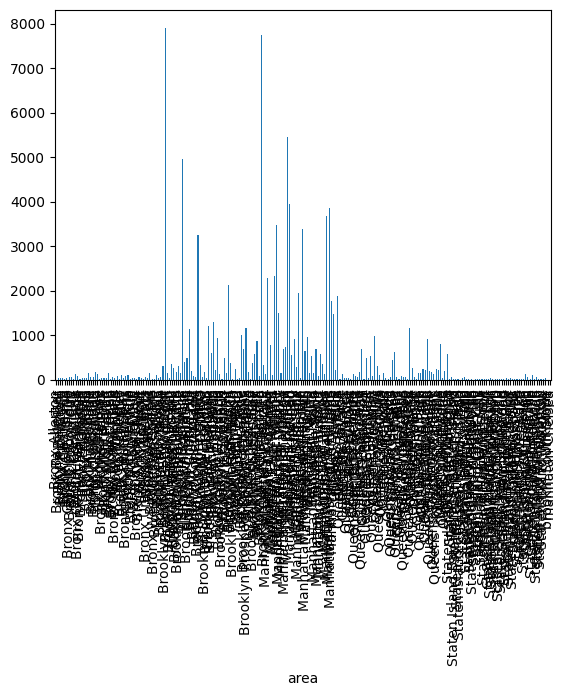

In [76]:
temp.plot(kind = 'bar')